In [1]:
import torch
from torch import nn
import torch.nn.functional as F
from torch.nn.utils.rnn import pad_sequence, pack_sequence
from torch import optim
from torch.utils.data import Dataset, DataLoader, random_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import argparse
# import summary
from model_model import WIDAEV1, WIDAEV2
from model_dataset import DS_Tools
from model_dataset import WordDatasetWord as TrainDataset
from model_dataset import TargetVowelDatasetWord as TestDataset
from model_dataset import Normalizer, DeNormalizer, TokenMap, WordDictionary
from model_dataset import MelSpecTransformDB as TheTransform
from paths import *
from misc_my_utils import *
from misc_recorder import *
from model_loss import *
from model_padding import generate_mask_from_lengths_mat

BATCH_SIZE = 512
INPUT_DIM = 64
OUTPUT_DIM = 64 
INTER_DIM_0 = 32
INTER_DIM_1 = 16
INTER_DIM_2 = 8
ENC_SIZE_LIST = [INPUT_DIM, INTER_DIM_0, INTER_DIM_1, INTER_DIM_2]
DEC_SIZE_LIST = [OUTPUT_DIM, INTER_DIM_0, INTER_DIM_1, INTER_DIM_2]
DROPOUT = 0.5
NUM_LAYERS = 2
EMBEDDING_DIM = 128
REC_SAMPLE_RATE = 16000
N_FFT = 400
N_MELS = 64
LOADER_WORKER = 32

In [2]:
mapper = WordDictionary(os.path.join(src_, "unique_words_list.dict"))
embedding_dim = mapper.token_num()

In [3]:
model = WIDAEV1(enc_size_list=ENC_SIZE_LIST, 
            dec_size_list=DEC_SIZE_LIST, 
            embedding_dim=embedding_dim, 
            num_layers=NUM_LAYERS, dropout=DROPOUT)

In [4]:
model.load_state_dict(torch.load(os.path.join(model_save_, "C_0D-0412203108-1", "ae", "u", "99.pt")))

<All keys matched successfully>

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 31990 samples in 0.028s...
[t-SNE] Computed neighbors for 31990 samples in 6.518s...
[t-SNE] Computed conditional probabilities for sample 1000 / 31990
[t-SNE] Computed conditional probabilities for sample 2000 / 31990
[t-SNE] Computed conditional probabilities for sample 3000 / 31990
[t-SNE] Computed conditional probabilities for sample 4000 / 31990
[t-SNE] Computed conditional probabilities for sample 5000 / 31990
[t-SNE] Computed conditional probabilities for sample 6000 / 31990
[t-SNE] Computed conditional probabilities for sample 7000 / 31990
[t-SNE] Computed conditional probabilities for sample 8000 / 31990
[t-SNE] Computed conditional probabilities for sample 9000 / 31990
[t-SNE] Computed conditional probabilities for sample 10000 / 31990
[t-SNE] Computed conditional probabilities for sample 11000 / 31990
[t-SNE] Computed conditional probabilities for sample 12000 / 31990
[t-SNE] Computed conditional probabilities for sa

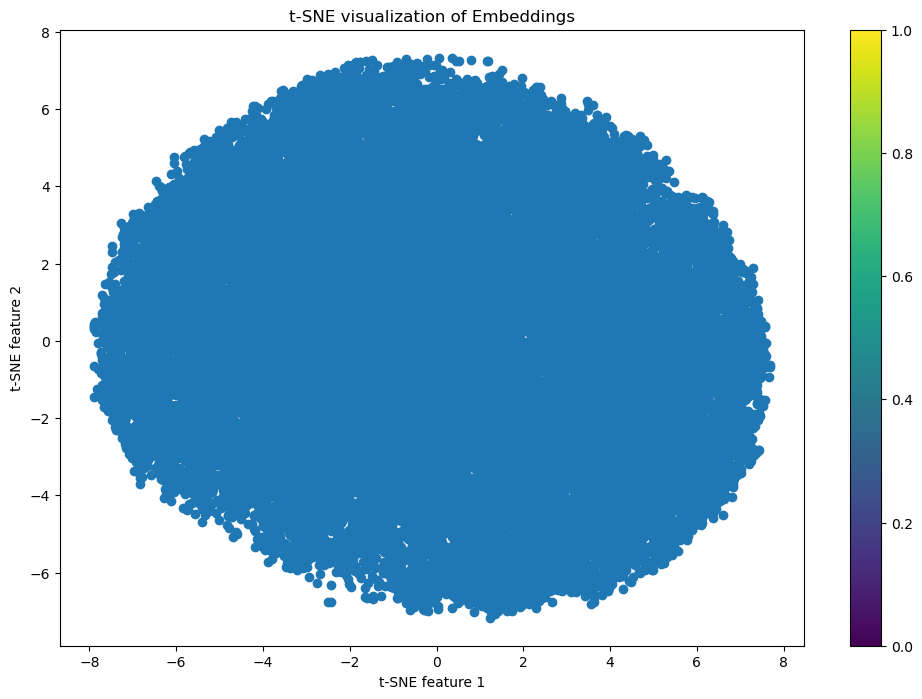

In [5]:
import matplotlib.pyplot as plt

# Extract embeddings to a NumPy array
embeddings = model.word_embedding.weight.detach().numpy()

from sklearn.manifold import TSNE

# Perform t-SNE dimensionality reduction
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(embeddings)

# Plot the result of t-SNE
plt.figure(figsize=(12, 8))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.colorbar()
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.title('t-SNE visualization of Embeddings')
plt.show()
